Using Matplotlib for making graphs to understand Titanic data on a broader level.

In [1]:
%matplotlib notebook

In [2]:
# Importing Dependencies
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


C:\Users\Deepti\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Step 1: Importing Files 
titanic_file = "C:/Users/Deepti/Washu BootCamp - HW/Machine Learning/all/train.csv"
titanic_file_df=pd.read_csv(titanic_file)
titanic_file_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Dropping missing values. Some Columns have NAN.
# titanic_file_df=titanic_file_df.dropna()
# titanic_file_df
titanic_file_df.columns
titanic_file_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# 0= female 1= male
titanic_file_df["Sex"]=np.where(titanic_file_df["Sex"]=="female",0,1)
titanic_file_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
median_age = titanic_file_df["Age"].median()
median_age

28.0

In [7]:
titanic_file_df["Age"].fillna(median_age,inplace = True)
titanic_file_df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [8]:
# Counting 0's and 1's in Survived Column. 0 = Not Survived 1= Survived
survived_group=titanic_file_df.groupby("Survived")
survived_count = survived_group["Survived"].count()
survived_count


Survived
0    549
1    342
Name: Survived, dtype: int64

In [9]:
survived_count.rename(columns ={0:"Survived",1:"Not Survived"}, inplace=True)
survived_count


Survived
0    549
1    342
dtype: int64

In [10]:
# Creating first chart to show basic information on Survival or not count.
# survived_chart = titanic_file_df.plot.scatter(x="Survived")
# survived_chart.set_xlabel("Total survived/Not survived")
# survived_chart.set_ylabel("Total Passengers")
# survived_chart.set_title("Survived v/s Not Survived(Survived=1)")
# survived_chart
# plt.show()
# plt.tight_layout()


In [11]:
class_group=titanic_file_df.groupby("Pclass")
class_count=class_group.sum()
class_count.Survived
# Excel Pivot table data for cross checking
# Class 0	1	Total
# 1	 80	136	216
# 2	 97	87	184
# 3	 372	119	491
# Total	549	342	891



Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [12]:
# Below table gives details of all survived in P1/2/3 class....further details on age ,sibsp, parch.
class_group=titanic_file_df.groupby("Pclass").mean()
class_group


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.564815,36.812130,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.586957,29.765380,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.706721,25.932627,0.615071,0.393075,13.675550


In [13]:
mclass_group=titanic_file_df.groupby(["Pclass","Sex"]).mean()
mclass_group

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                  
1      0     469.212766  0.968085  33.978723  0.553191  0.457447  106.125798
       1     455.729508  0.368852  38.995246  0.311475  0.278689   67.226127
2      0     443.105263  0.921053  28.703947  0.486842  0.605263   21.970121
       1     447.962963  0.157407  30.512315  0.342593  0.222222   19.741782
3      0     399.729167  0.500000  23.572917  0.895833  0.798611   16.118810
       1     455.515850  0.135447  26.911873  0.498559  0.224784   12.661633

<IPython.core.display.Javascript object>


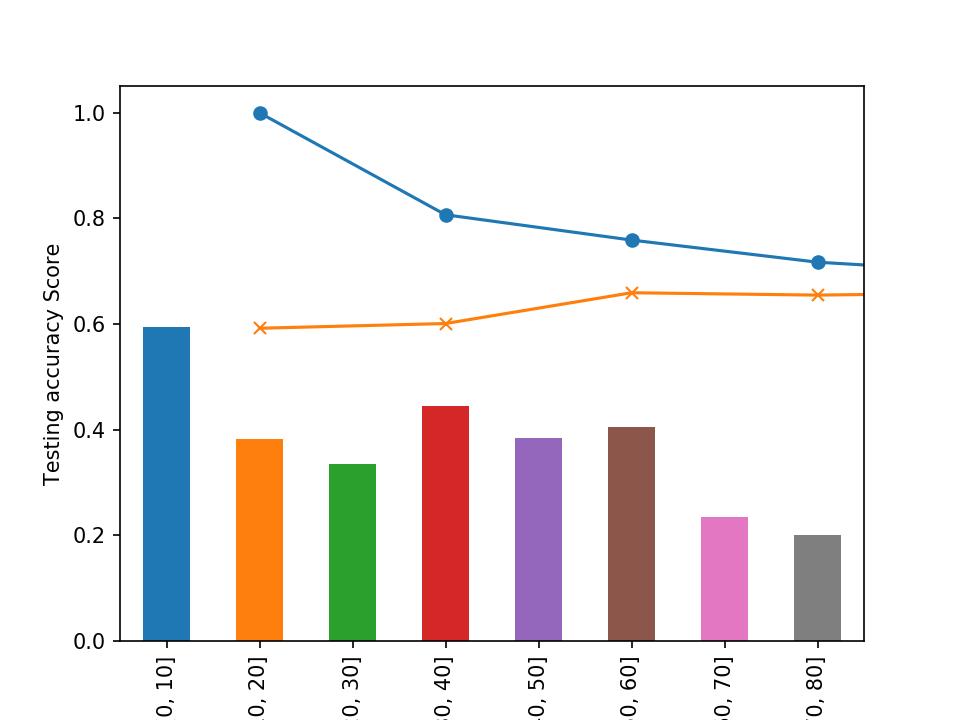

In [14]:
age_group=pd.cut(titanic_file_df["Age"],np.arange(0,90,10))
age_grouping =titanic_file_df.groupby(age_group).mean()
# age_grouping["Survived"].head()
age_grouping["Survived"].plot.bar()

# Decision Tree

In [15]:
target = titanic_file_df["Survived"]
target_names =["Not Survived","Survived"]

In [16]:
data=titanic_file_df.drop("Survived", axis=1)
feature_names = data.columns
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Removing below columns so that the columns are all uniform. Otherwise need to use One_Hot_Encoding  
data=titanic_file_df.drop(["Name","Ticket","Cabin","Embarked","Survived"],axis=1)
data.count()

PassengerId    891
Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
dtype: int64

In [18]:
# titanic_file_df['Survived'].dtype

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
print("X_train",X_train)
# print("X_test",X_test)
print("y_train",y_train)
# print("y_test",y_test)


X_train      PassengerId  Pclass  Sex    Age  SibSp  Parch      Fare
298          299       1    1  28.00      0      0   30.5000
884          885       3    1  25.00      0      0    7.0500
247          248       2    0  24.00      0      2   14.5000
478          479       3    1  22.00      0      0    7.5208
305          306       1    1   0.92      1      2  151.5500
316          317       2    0  24.00      1      0   26.0000
2              3       3    0  26.00      0      0    7.9250
405          406       2    1  34.00      1      0   21.0000
742          743       1    0  21.00      2      2  262.3750
260          261       3    1  28.00      0      0    7.7500
367          368       3    0  28.00      0      0    7.2292
158          159       3    1  28.00      0      0    8.6625
554          555       3    0  22.00      0      0    7.7750
829          830       1    0  62.00      0      0   80.0000
677          678       3    0  18.00      0      0    9.8417
380          381

# Random Forest

In [20]:
# Create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

accuracy = rf.score(X_test, y_test)
print("Accuracy = {} %".format(accuracy*100))

# # Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
print("imp",importances)

# # We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
# Using Random Forest, we get 81.61% accuracy in prediction. 

Accuracy = 82.0627802690583 %
imp [0.2026064  0.0746949  0.25243783 0.17136965 0.04584669 0.03195638
 0.22108815]


[(0.2524378279263806, 'Name'),
 (0.22108815145444752, 'Parch'),
 (0.20260639994235496, 'PassengerId'),
 (0.17136965406360136, 'Sex'),
 (0.07469489995022431, 'Pclass'),
 (0.04584668540345136, 'Age'),
 (0.03195638125954031, 'SibSp')]

In [21]:
# Decsion Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
# The below result, 0.77, indicated that the model is predicting the survival of 77%!

0.7668161434977578

# Logistic Regression Model

In [22]:

classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8023952095808383
Testing Data Score: 0.7982062780269058


In [25]:
# # Make predictions
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})



,Prediction,Actual
709,0,1
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1


# KNN - K Nearest Neighbor

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


In [27]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    


k: 1, Train/Test Score: 1.000/0.592
k: 3, Train/Test Score: 0.807/0.601
k: 5, Train/Test Score: 0.759/0.659
k: 7, Train/Test Score: 0.717/0.655
k: 9, Train/Test Score: 0.696/0.659
k: 11, Train/Test Score: 0.684/0.641
k: 13, Train/Test Score: 0.693/0.650
k: 15, Train/Test Score: 0.683/0.650
k: 17, Train/Test Score: 0.665/0.668
k: 19, Train/Test Score: 0.677/0.686


In [28]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [29]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.650


# SVM

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [31]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.776


In [33]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.80      0.83      0.82       134
    Survived       0.73      0.70      0.71        89

 avg / total       0.77      0.78      0.77       223

